In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics.scorer import make_scorer


pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_IDS = test['Accident_ID']
n_train = train.shape[0]
n_test = test.shape[0]
data = pd.concat([train,test])
del data['Accident_ID']
print(data.shape)
print(n_train)
print(n_test)


(12500, 11)
10000
2500


In [3]:
data.head()

,Accident_Type_Code,Adverse_Weather_Metric,Cabin_Temperature,Control_Metric,Days_Since_Inspection,Max_Elevation,Safety_Score,Severity,Total_Safety_Complaints,Turbulence_In_gforces,Violations
0,2,0.424352,78.04,71.285324,14,31335.476824,49.223744,Minor_Damage_And_Injuries,22,0.272118,3
1,2,0.352350,84.54,72.288058,10,26024.711057,62.465753,Minor_Damage_And_Injuries,27,0.423939,2
2,7,0.003364,78.86,66.362808,13,39269.053927,63.059361,Significant_Damage_And_Fatalities,16,0.322604,3
3,3,0.211728,81.79,74.703737,11,42771.499200,48.082192,Significant_Damage_And_Serious_Injuries,9,0.337029,1
4,3,0.176883,77.16,47.948952,13,35509.228515,26.484018,Significant_Damage_And_Fatalities,25,0.541140,2


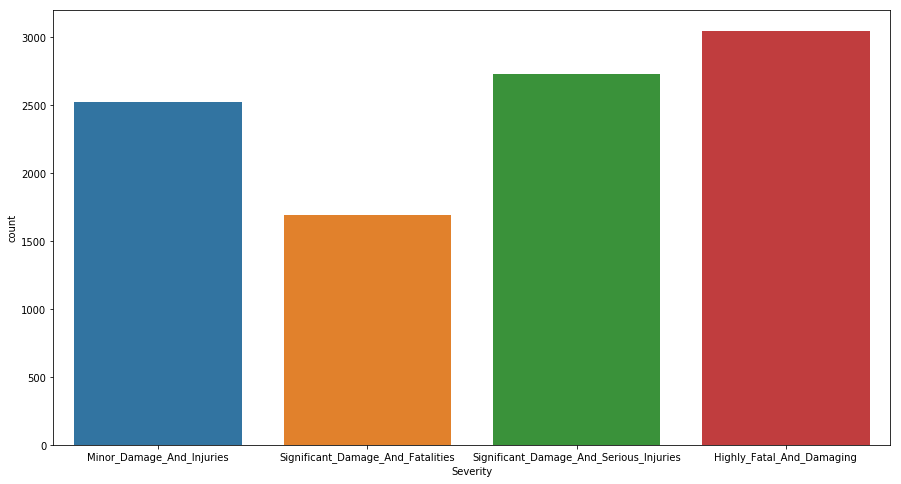

In [4]:
plt.figure(figsize=(15,8))
sns.countplot(train['Severity'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 2499
Data columns (total 11 columns):
Accident_Type_Code         12500 non-null int64
Adverse_Weather_Metric     12500 non-null float64
Cabin_Temperature          12500 non-null float64
Control_Metric             12500 non-null float64
Days_Since_Inspection      12500 non-null int64
Max_Elevation              12500 non-null float64
Safety_Score               12500 non-null float64
Severity                   10000 non-null object
Total_Safety_Complaints    12500 non-null int64
Turbulence_In_gforces      12500 non-null float64
Violations                 12500 non-null int64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.1+ MB


In [6]:
a = pd.get_dummies(data['Accident_Type_Code'], prefix = "Accident_Type_Code")
frames = [data, a]
data = pd.concat(frames, axis = 1)
data = data.drop(columns = ['Accident_Type_Code'])
data.head()

,Adverse_Weather_Metric,Cabin_Temperature,Control_Metric,Days_Since_Inspection,Max_Elevation,Safety_Score,Severity,Total_Safety_Complaints,Turbulence_In_gforces,Violations,Accident_Type_Code_1,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
0,0.424352,78.04,71.285324,14,31335.476824,49.223744,Minor_Damage_And_Injuries,22,0.272118,3,0,1,0,0,0,0,0
1,0.352350,84.54,72.288058,10,26024.711057,62.465753,Minor_Damage_And_Injuries,27,0.423939,2,0,1,0,0,0,0,0
2,0.003364,78.86,66.362808,13,39269.053927,63.059361,Significant_Damage_And_Fatalities,16,0.322604,3,0,0,0,0,0,0,1
3,0.211728,81.79,74.703737,11,42771.499200,48.082192,Significant_Damage_And_Serious_Injuries,9,0.337029,1,0,0,1,0,0,0,0
4,0.176883,77.16,47.948952,13,35509.228515,26.484018,Significant_Damage_And_Fatalities,25,0.541140,2,0,0,1,0,0,0,0


In [7]:
train_data = data.iloc[:n_train]
test_data = data.iloc[n_train:]

del test_data['Severity']

print(train_data.shape)
print(test_data.shape)

(10000, 17)
(2500, 16)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['Severity'] = le.fit_transform(train_data['Severity'])

In [9]:
test_data.head()

,Adverse_Weather_Metric,Cabin_Temperature,Control_Metric,Days_Since_Inspection,Max_Elevation,Safety_Score,Total_Safety_Complaints,Turbulence_In_gforces,Violations,Accident_Type_Code_1,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
0,0.069692,78.32,72.151322,16,37949.724386,19.497717,6,0.388959,2,0,0,0,1,0,0,0
1,0.002777,78.60,64.585232,15,30194.805567,58.173516,3,0.250841,2,0,0,0,0,0,0,1
2,0.004316,86.96,64.721969,15,17572.925484,33.287671,3,0.336669,1,0,0,0,0,0,1,0
3,0.199990,80.86,66.362808,21,40209.186341,3.287671,5,0.421775,2,0,0,1,0,0,0,0
4,0.483696,79.22,56.107566,18,35495.525408,10.867580,2,0.313228,2,0,1,0,0,0,0,0


In [10]:
train_data = train_data[['Adverse_Weather_Metric',
 'Cabin_Temperature',
 'Control_Metric',
 'Days_Since_Inspection',
 'Max_Elevation',
 'Safety_Score',
 'Total_Safety_Complaints',
 'Turbulence_In_gforces',
 'Violations',
 'Accident_Type_Code_1',
 'Accident_Type_Code_2',
 'Accident_Type_Code_3',
 'Accident_Type_Code_4',
 'Accident_Type_Code_5',
 'Accident_Type_Code_6',
 'Accident_Type_Code_7',
 'Severity']]

In [11]:
train_data.head()

,Adverse_Weather_Metric,Cabin_Temperature,Control_Metric,Days_Since_Inspection,Max_Elevation,Safety_Score,Total_Safety_Complaints,Turbulence_In_gforces,Violations,Accident_Type_Code_1,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7,Severity
0,0.424352,78.04,71.285324,14,31335.476824,49.223744,22,0.272118,3,0,1,0,0,0,0,0,1
1,0.352350,84.54,72.288058,10,26024.711057,62.465753,27,0.423939,2,0,1,0,0,0,0,0,1
2,0.003364,78.86,66.362808,13,39269.053927,63.059361,16,0.322604,3,0,0,0,0,0,0,1,2
3,0.211728,81.79,74.703737,11,42771.499200,48.082192,9,0.337029,1,0,0,1,0,0,0,0,3
4,0.176883,77.16,47.948952,13,35509.228515,26.484018,25,0.541140,2,0,0,1,0,0,0,0,2


In [12]:
# y = train_data.Severity.values
# x = train_data.drop(['Severity'], axis = 1)
x = train_data.iloc[:,0:-1]  #independent columns
y = train_data.iloc[:,-1]    #target column 



In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy1))
report = classification_report(y_test, y_pred, labels=None)
print(report)

Accuracy: 56.60
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       620
           1       0.56      0.55      0.55       493
           2       0.48      0.37      0.42       312
           3       0.59      0.66      0.62       575

   micro avg       0.57      0.57      0.57      2000
   macro avg       0.55      0.54      0.54      2000
weighted avg       0.56      0.57      0.56      2000



In [15]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 21)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy2))
report = classification_report(y_test, y_pred, labels=None)
print(report)

Accuracy: 56.60
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       620
           1       0.56      0.55      0.55       493
           2       0.48      0.37      0.42       312
           3       0.59      0.66      0.62       575

   micro avg       0.57      0.57      0.57      2000
   macro avg       0.55      0.54      0.54      2000
weighted avg       0.56      0.57      0.56      2000



In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy3 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy3))
report = classification_report(y_test, y_pred, labels=None)
print(report)

Accuracy: 83.65
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       620
           1       0.76      0.84      0.80       493
           2       0.84      0.76      0.79       312
           3       0.89      0.82      0.86       575

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000



In [17]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(n_estimators=200)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy4 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy4))
report = classification_report(y_test, y_pred, labels=None)
print(report)

Accuracy: 88.20
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       620
           1       0.78      0.89      0.83       493
           2       0.89      0.92      0.91       312
           3       0.92      0.89      0.91       575

   micro avg       0.88      0.88      0.88      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.89      0.88      0.88      2000



In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=250, max_depth=5, subsample=0.9, random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
accuracy5 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy5))
report = classification_report(y_test, y_pred, labels=None)
print(report)



Accuracy: 96.70
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       620
           1       0.96      0.98      0.97       493
           2       0.94      0.98      0.96       312
           3       0.98      0.96      0.97       575

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.96      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [42]:
pred = gb.predict(test_data)
predictions = le.inverse_transform(pred)

In [43]:
out = pd.DataFrame({'Accident_ID' : test_IDS, 'Severity' : predictions})
out.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [44]:
out.to_csv('Sub.csv', index=False)